In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [121]:
df = sns.load_dataset('iris')

In [122]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [123]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [124]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

df['species'].unique()

array([0, 1, 2])

In [125]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [126]:
df = df[['sepal_length','petal_length','species']]

In [127]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [128]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [130]:
clf = LogisticRegression(multi_class='multinomial')

In [131]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [132]:
y_pred = clf.predict(X_test)

In [133]:
y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [134]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


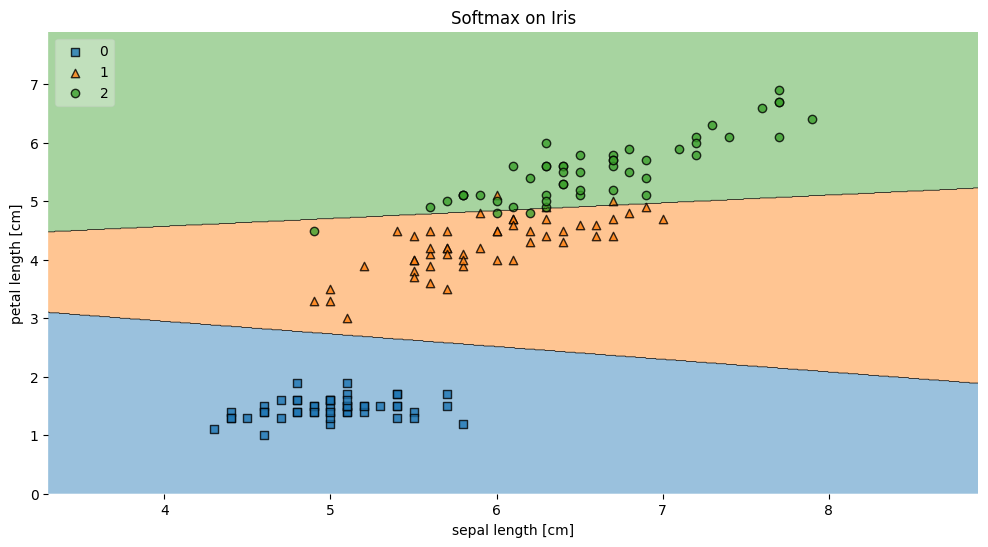

In [135]:
plt.figure(figsize=(12, 6))
plot_decision_regions(X.values, y.values, clf, legend=2)
# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()